In [1]:
from carla_disentanglement.datasets.dsprites import DSpritesDataset, DSpritesDatasetMini
from carla_disentanglement.datasets.shapes import Shapes3DDataset
import numpy as np
from models.annealed_vae import AnnealedVAE
from models.beta_tcvae import BetaTCVAE
from models.beta_vae import BetaVAE
from models.geco_vae import GecoVAE
from models.info_vae import InfoVAE
from architectures.SimpleConv64 import *
from architectures.Conv64 import *
# from architectures.ResConv import *
# from architectures.ResConv64 import *
from architectures.LeakyConv64 import *
from architectures.LConv64 import *
from architectures.LSConv64 import *
from architectures.LSConv64Stride1 import *
from architectures.InvRes import *
import torch
import random


In [2]:
ds = Shapes3DDataset()

In [3]:
seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
z_dim = 10
num_channels = 3
image_size = 64
batch_size=256

In [5]:
# vae = AnnealedVAE(GaussianConv64(z_dim, num_channels, image_size), Conv64Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=2)
# vae = AnnealedVAE(SimpleGaussianConv64(z_dim, num_channels, image_size), SimpleConv64Decoder(z_dim, num_channels, image_size), beta=50.0, max_c=20, iterations_c=4)
# vae = AnnealedVAE(GaussianConv64(z_dim, num_channels, image_size), Conv64Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=8, reconstruction='mse')
# vae = AnnealedVAE(Encoder(num_channels, z_dim, , image_size), Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=8, reconstruction='mse')

#vae = AnnealedVAE(GaussianResConv64(z_dim, num_channels, image_size), ResConv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')
# vae = BetaVAE(GaussianResConv64(z_dim, num_channels, image_size), ResConv64Decoder(z_dim, num_channels, image_size))
# vae = BetaVAE(GaussianLConv64(z_dim, num_channels, image_size), LConv64Decoder(z_dim, num_channels, image_size))
# vae = AnnealedVAE(GaussianLConv64(z_dim, num_channels, image_size), LConv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')
# vae = AnnealedVAE(GaussianLeakyConv64(z_dim, num_channels, image_size), LeakyConv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')

vae = AnnealedVAE(InvertedResidualVAEModel(z_dim, num_channels), gamma=100.0, max_c=15, iterations_c=2e4, reconstruction='bce', tag='3dshape_c15')
# vae = GecoVAE(InvertedResidualVAEModel(z_dim, num_channels), tolerance=10./255., lbd_step=500, lambda_init=0.1, beta=1.0, tag="3dshapes_tol10_lmb.1")

cuda


In [6]:
vae.initOptimizer(lr=5e-4) #, betas=(0.9,0.999)

In [7]:
# vae.train(ds, epochs=40, reconstruction_every=1, eval_every=1, save_every=1, batch_size=batch_size, num_workers=0, reconstruct_indices=[0,1000,2000,65000,-30000,-1])
vae.train(ds, epochs=41, reconstruction_every=1, eval_every=1, score_every=10, save_every=10, batch_size=batch_size, num_workers=0, reconstruct_indices=[0,1000,2000,65000,-30000,-1])

  0%|          | 2/469 [00:00<00:28, 16.11it/s]

{'epoch': 0, 'step': 1407, 'loss': 5521.1836, 'last_save': None}


100%|██████████| 469/469 [00:28<00:00, 16.40it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05


  0%|          | 0/1407 [00:00<?, ?it/s]

{'beta_vae_score': {'train_accuracy': 0.9989, 'eval_accuracy': 0.9976}, 'factor_vae_score': {'train_accuracy': 0.8591, 'eval_accuracy': 0.8628, 'num_active_dims': 10}, 'mig_score': {'discrete_mig': 0.16652714632898388}, 'dci_score': {'informativeness_train': 0.8664000000000001, 'informativeness_test': 0.7840666666666666, 'disentanglement': 0.6020602305236262, 'completeness': 0.5541396186839763}, 'sap_score': {'SAP_score': 0.055000000000000014}}


  0%|          | 2/469 [00:00<00:28, 16.11it/s]

{'epoch': 1, 'step': 2814, 'loss': 4783.3213, 'last_save': 'vae_1_2021-11-17_10-14-05_4783.3213.save'}


  0%|          | 2/469 [00:00<00:29, 15.68it/s]

{'epoch': 2, 'step': 4221, 'loss': 4627.1562, 'last_save': 'vae_2_2021-11-17_10-18-42_4627.1562.save'}


  0%|          | 2/469 [00:00<00:28, 16.11it/s]

{'epoch': 3, 'step': 5628, 'loss': 4499.247, 'last_save': 'vae_3_2021-11-17_10-23-19_4499.247.save'}


  0%|          | 2/469 [00:00<00:29, 15.70it/s]

{'epoch': 4, 'step': 7035, 'loss': 4377.4175, 'last_save': 'vae_4_2021-11-17_10-27-59_4377.4175.save'}


  0%|          | 2/469 [00:00<00:29, 15.99it/s]

{'epoch': 5, 'step': 8442, 'loss': 4262.9307, 'last_save': 'vae_5_2021-11-17_10-32-37_4262.9307.save'}


  0%|          | 2/469 [00:00<00:30, 15.14it/s]

{'epoch': 6, 'step': 9849, 'loss': 4149.6406, 'last_save': 'vae_6_2021-11-17_10-37-14_4149.6406.save'}


  0%|          | 2/469 [00:00<00:28, 16.47it/s]

{'epoch': 7, 'step': 11256, 'loss': 4037.2107, 'last_save': 'vae_7_2021-11-17_10-41-51_4037.2107.save'}


  0%|          | 2/469 [00:00<00:31, 14.83it/s]

{'epoch': 8, 'step': 12663, 'loss': 3932.523, 'last_save': 'vae_8_2021-11-17_10-46-26_3932.523.save'}


  0%|          | 2/469 [00:00<00:28, 16.15it/s]

{'epoch': 9, 'step': 14070, 'loss': 3836.7578, 'last_save': 'vae_9_2021-11-17_10-51-04_3836.7578.save'}


  0%|          | 2/469 [00:00<00:31, 14.97it/s]

{'epoch': 10, 'step': 15477, 'loss': 3761.1345, 'last_save': 'vae_10_2021-11-17_10-55-41_3761.1345.save'}


100%|██████████| 469/469 [00:28<00:00, 16.34it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05


  0%|          | 1/1407 [00:00<02:23,  9.78it/s]

{'beta_vae_score': {'train_accuracy': 1.0, 'eval_accuracy': 0.9998}, 'factor_vae_score': {'train_accuracy': 0.8358, 'eval_accuracy': 0.8422, 'num_active_dims': 10}, 'mig_score': {'discrete_mig': 0.25401219849184525}, 'dci_score': {'informativeness_train': 0.9620833333333333, 'informativeness_test': 0.9352333333333332, 'disentanglement': 0.7588135768289299, 'completeness': 0.6948588443477431}, 'sap_score': {'SAP_score': 0.04999999999999999}}


  0%|          | 2/469 [00:00<00:29, 15.73it/s]

{'epoch': 11, 'step': 16884, 'loss': 3700.4783, 'last_save': 'vae_11_2021-11-17_11-08-46_3700.4783.save'}


  0%|          | 2/469 [00:00<00:29, 15.86it/s]

{'epoch': 12, 'step': 18291, 'loss': 3650.2974, 'last_save': 'vae_12_2021-11-17_11-13-22_3650.2974.save'}


  0%|          | 2/469 [00:00<00:31, 14.70it/s]

{'epoch': 13, 'step': 19698, 'loss': 3610.9858, 'last_save': 'vae_13_2021-11-17_11-17-59_3610.9858.save'}


  0%|          | 2/469 [00:00<00:28, 16.61it/s]

{'epoch': 14, 'step': 21105, 'loss': 3588.8381, 'last_save': 'vae_14_2021-11-17_11-22-36_3588.8381.save'}


  0%|          | 2/469 [00:00<00:31, 14.91it/s]

{'epoch': 15, 'step': 22512, 'loss': 3581.1978, 'last_save': 'vae_15_2021-11-17_11-27-14_3581.1978.save'}


  0%|          | 2/469 [00:00<00:30, 15.25it/s]

{'epoch': 16, 'step': 23919, 'loss': 3576.5334, 'last_save': 'vae_16_2021-11-17_11-31-54_3576.5334.save'}


  0%|          | 2/469 [00:00<00:32, 14.48it/s]

{'epoch': 17, 'step': 25326, 'loss': 3572.2083, 'last_save': 'vae_17_2021-11-17_11-36-39_3572.2083.save'}


  0%|          | 2/469 [00:00<00:29, 15.99it/s]

{'epoch': 18, 'step': 26733, 'loss': 3569.3574, 'last_save': 'vae_18_2021-11-17_11-41-23_3569.3574.save'}


  0%|          | 2/469 [00:00<00:29, 15.73it/s]

{'epoch': 19, 'step': 28140, 'loss': 3565.0432, 'last_save': 'vae_19_2021-11-17_11-46-00_3565.0432.save'}


  0%|          | 2/469 [00:00<00:29, 15.87it/s]

{'epoch': 20, 'step': 29547, 'loss': 3563.5774, 'last_save': 'vae_20_2021-11-17_11-50-37_3563.5774.save'}


100%|██████████| 469/469 [00:28<00:00, 16.35it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05


  0%|          | 0/1407 [00:00<?, ?it/s]

{'beta_vae_score': {'train_accuracy': 0.9999, 'eval_accuracy': 0.9998}, 'factor_vae_score': {'train_accuracy': 0.849, 'eval_accuracy': 0.852, 'num_active_dims': 10}, 'mig_score': {'discrete_mig': 0.3386535074262207}, 'dci_score': {'informativeness_train': 0.9895666666666667, 'informativeness_test': 0.9826666666666667, 'disentanglement': 0.8346737844852021, 'completeness': 0.764047938502442}, 'sap_score': {'SAP_score': 0.04833333333333332}}


  0%|          | 2/469 [00:00<00:28, 16.11it/s]

{'epoch': 21, 'step': 30954, 'loss': 3561.2368, 'last_save': 'vae_21_2021-11-17_12-03-35_3561.2368.save'}


  0%|          | 2/469 [00:00<00:28, 16.25it/s]

{'epoch': 22, 'step': 32361, 'loss': 3559.3342, 'last_save': 'vae_22_2021-11-17_12-08-11_3559.3342.save'}


  0%|          | 2/469 [00:00<00:28, 16.25it/s]

{'epoch': 23, 'step': 33768, 'loss': 3556.4333, 'last_save': 'vae_23_2021-11-17_12-12-47_3556.4333.save'}


  0%|          | 2/469 [00:00<00:28, 16.38it/s]

{'epoch': 24, 'step': 35175, 'loss': 3555.5713, 'last_save': 'vae_24_2021-11-17_12-17-24_3555.5713.save'}


  0%|          | 2/469 [00:00<00:29, 16.00it/s]

{'epoch': 25, 'step': 36582, 'loss': 3554.0881, 'last_save': 'vae_25_2021-11-17_12-22-02_3554.0881.save'}


  0%|          | 2/469 [00:00<00:28, 16.11it/s]

{'epoch': 26, 'step': 37989, 'loss': 3550.936, 'last_save': 'vae_26_2021-11-17_12-26-39_3550.936.save'}


  0%|          | 2/469 [00:00<00:30, 15.25it/s]

{'epoch': 27, 'step': 39396, 'loss': 3550.4214, 'last_save': 'vae_27_2021-11-17_12-31-18_3550.4214.save'}


  0%|          | 2/469 [00:00<00:28, 16.25it/s]

{'epoch': 28, 'step': 40803, 'loss': 3548.5615, 'last_save': 'vae_28_2021-11-17_12-36-02_3548.5615.save'}


  0%|          | 2/469 [00:00<00:31, 14.90it/s]

{'epoch': 29, 'step': 42210, 'loss': 3548.5676, 'last_save': 'vae_29_2021-11-17_12-40-39_3548.5676.save'}


  0%|          | 2/469 [00:00<00:28, 16.11it/s]

{'epoch': 30, 'step': 43617, 'loss': 3546.7417, 'last_save': 'vae_30_2021-11-17_12-45-12_3546.7417.save'}


100%|██████████| 469/469 [00:28<00:00, 16.67it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05


  0%|          | 0/1407 [00:00<?, ?it/s]

{'beta_vae_score': {'train_accuracy': 0.9999, 'eval_accuracy': 0.9998}, 'factor_vae_score': {'train_accuracy': 0.858, 'eval_accuracy': 0.859, 'num_active_dims': 10}, 'mig_score': {'discrete_mig': 0.3444968267466611}, 'dci_score': {'informativeness_train': 0.9943166666666666, 'informativeness_test': 0.9883666666666665, 'disentanglement': 0.8387866201701446, 'completeness': 0.7730228304047579}, 'sap_score': {'SAP_score': 0.05000000000000001}}


  0%|          | 2/469 [00:00<00:28, 16.25it/s]

{'epoch': 31, 'step': 45024, 'loss': 3544.9062, 'last_save': 'vae_31_2021-11-17_12-58-00_3544.9062.save'}


  0%|          | 2/469 [00:00<00:29, 15.86it/s]

{'epoch': 32, 'step': 46431, 'loss': 3544.0889, 'last_save': 'vae_32_2021-11-17_13-02-33_3544.0889.save'}


  0%|          | 2/469 [00:00<00:28, 16.25it/s]

{'epoch': 33, 'step': 47838, 'loss': 3543.0156, 'last_save': 'vae_33_2021-11-17_13-07-06_3543.0156.save'}


  0%|          | 2/469 [00:00<00:29, 15.99it/s]

{'epoch': 34, 'step': 49245, 'loss': 3542.2866, 'last_save': 'vae_34_2021-11-17_13-11-39_3542.2866.save'}


  0%|          | 2/469 [00:00<00:29, 15.99it/s]

{'epoch': 35, 'step': 50652, 'loss': 3542.293, 'last_save': 'vae_35_2021-11-17_13-16-12_3542.293.save'}


  0%|          | 2/469 [00:00<00:29, 15.99it/s]

{'epoch': 36, 'step': 52059, 'loss': 3541.2034, 'last_save': 'vae_36_2021-11-17_13-20-45_3541.2034.save'}


  0%|          | 2/469 [00:00<00:28, 16.25it/s]

{'epoch': 37, 'step': 53466, 'loss': 3539.7732, 'last_save': 'vae_37_2021-11-17_13-25-18_3539.7732.save'}


  0%|          | 2/469 [00:00<00:28, 16.25it/s]

{'epoch': 38, 'step': 54873, 'loss': 3539.329, 'last_save': 'vae_38_2021-11-17_13-29-51_3539.329.save'}


  0%|          | 2/469 [00:00<00:29, 15.99it/s]

{'epoch': 39, 'step': 56280, 'loss': 3538.5217, 'last_save': 'vae_39_2021-11-17_13-34-24_3538.5217.save'}


  0%|          | 2/469 [00:00<00:28, 16.25it/s]

{'epoch': 40, 'step': 57687, 'loss': 3538.4753, 'last_save': 'vae_40_2021-11-17_13-38-57_3538.4753.save'}


100%|██████████| 469/469 [00:28<00:00, 16.73it/s]
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.05
{'beta_vae_score': {'train_accuracy': 0.9999, 'eval_accuracy': 0.9998}, 'factor_vae_score': {'train_accuracy': 0.8701, 'eval_accuracy': 0.8688, 'num_active_dims': 10}, 'mig_score': {'discrete_mig': 0.3498152665913296}, 'dci_score': {'informativeness_train': 0.9966833333333334, 'informativeness_test': 0.9909333333333334, 'disentanglement': 0.8387396196997172, 'completeness': 0.7738242903874578}, 'sap_score': {'SAP_score': 0.03833333333333333}}
saved vae_2021-11-17_13-47-39_3538.4753.save


In [8]:
_ = vae.model.eval()

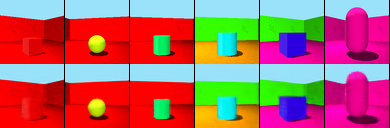

In [9]:
vae.visualize_reconstruction(ds, indices=[0,1000,2000,65000,-30000,-1])

In [10]:
vae.visualize_latents(ds, index=0)

'./viz/3dshape_c15_AnnealedVAE_beta100.0_2021-11-17_13-47-39.gif'

In [11]:
vae.visualize_latents(ds, index=-554)

'./viz/3dshape_c15_AnnealedVAE_beta100.0_2021-11-17_13-47-40.gif'